## Problem: PCA: Food consumption in Europe area


### Principal Component Analysis

Principal Component Analysis (PCA) is a machine learning algorithm to reduce the dimensionality of the data. It gives different directions (principal components) that maximize the variance of the data. It tries to give linearly unrelated orthogonal axes. 

The original observation $n \times p$ data matrix $X$ can be written in reduced dimention of $T$ where $\textbf{T} = \textbf{X} {\textbf{V}}$ and ${\textbf{V}}$ is a $p$-by-$p$ matrix of weights whose columns are the eigenvectors of $\textbf{X}^T \textbf{X}$. 

$X^TX$ itself can be recognised as proportional to the empirical sample covariance matrix of the dataset $X^T$. The sample covariance between two of the different principal components over the dataset is given by:

$$
Cov({PC}_j,{PC}_k ) = {\lambda_k} {\textbf{v}}_k^T {\textbf{v}}_k
$$


The $k$-th component can be found by subtracting the first $k − 1$ principal components from $\textbf{X}$ and then finding the weight vector which extracts the maximum variance from this new data matrix:

$$
\DeclareMathOperator*{\argmin}{argmin}
\DeclareMathOperator*{\ridge}{ridge}
\textbf{v}_{(k)} = \argmin \left\{ \frac{{\textbf{v}}^T  \textbf{X}_k^T  \textbf{X}_k \textbf{v}}{{\textbf{v}}^T \textbf{v}}   \right\}
$$


Data standardization is extremely important in PCA. Here, from each feature, I subtract the mean and divide it by standard deviation. This is done so that each feature is given equal importance and PCA (which essentially projects data into directions that maximize the variance along the axes) makes no errors.

A common way to implement PCA is through Eigen Decomposition. First create Co-variance matrix, then decompose it into Eigen vectors and Eigen values. Eigen vectors are the axes and Eigen values are the magnitude to be given to those axes.

The cumulative explained variance (cumulative of Eigen Values) shows contribution of principal components to describe about 95 percent of the data where we can drop the remaining components thereby reducing the dimensionality.

Another approach to implement PCA is Singular Value Decomposition (SVD). SVD takes a data matrix $\textbf{X}$ and produces the matrix factorisation $ \textbf{X} = \textbf{U} \boldsymbol\Sigma \textbf{V}^{T}$. The rows of $\textbf{V}^⊤$  contain the principal directions for the matrix $ \textbf{X}$. We call the columns of $ \textbf{T} = \textbf{U} \boldsymbol\Sigma$ the principal components of $ \textbf{X} $.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
display(HTML("<style>.output_result { max-width:98% !important; }</style>"))
sns.set()

In [2]:
path = './Technical Assessment - Data Science'

perfix = '' 
file_name =  '' 

os.chdir(path)

In [3]:
# list files in Task data folder

with os.scandir() as bag:
    for obj in bag:
        if obj.is_file():
            print(obj.name)

food-consumption.csv
JET_DATA_1.7z
sydney.jpg
Technical Assessment - Data Science.pdf


### Read Food Consumption Dataset

In [4]:
dataset_food = 'food-consumption.csv'

In [5]:

# dateparse = lambda x: datetime.strptime(x, '%H%M')
# df_flight_csv = pd.read_csv(dataset_flight, sep=',', header='infer', dtype=cols, parse_dates=dt_cols, date_parser=dateparse)

df_food_csv = pd.read_csv(dataset_food, sep=',', header='infer')
df_food = df_food_csv.copy()
df_food

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19.0,57.0,51,19,21,27,...,81,75,44,71,22,91,85,74,30.0,26
1,Italy,82,10,60,2.0,55.0,41,3,2,4,...,67,71,9,46,80,66,24,94,5.0,18
2,France,88,42,63,4.0,76.0,53,11,23,11,...,87,84,40,45,88,94,47,36,57.0,3
3,Holland,96,62,98,32.0,62.0,67,43,7,14,...,83,89,61,81,15,31,97,13,53.0,15
4,Belgium,94,38,48,11.0,74.0,37,23,9,13,...,76,76,42,57,29,84,80,83,20.0,5
5,Luxembourg,97,61,86,28.0,79.0,73,12,7,26,...,85,94,83,20,91,94,94,84,31.0,24
6,England,27,86,99,22.0,91.0,55,76,17,20,...,76,68,89,91,11,95,94,57,11.0,28
7,Portugal,72,26,77,2.0,22.0,34,1,5,20,...,22,51,8,16,89,65,78,92,6.0,9
8,Austria,55,31,61,15.0,29.0,33,1,5,15,...,49,42,14,41,51,51,72,28,13.0,11
9,Switzerland,73,72,85,25.0,31.0,69,10,17,19,...,79,70,46,61,64,82,48,61,48.0,30


## Exploratory Data Analysis

In [6]:
df_food[df_food.isnull().any(axis=1)]

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
10,Sweden,97,13,93,31.0,NaN,43,43,39,54,...,56,78,53,75,9,68,32,48,2.0,93
13,Finland,98,12,84,20.0,64.0,27,10,8,18,...,50,57,22,37,15,96,94,17,NaN,64
14,Spain,70,40,40,NaN,62.0,43,2,14,23,...,59,77,30,38,86,44,51,91,16.0,13


In [7]:
df_food.dropna(axis=0, how="any", inplace=True)
df_food.reset_index(drop=True, inplace=True)
df_food.astype({col: int for col in df_food.columns[1:]})

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5
5,Luxembourg,97,61,86,28,79,73,12,7,26,...,85,94,83,20,91,94,94,84,31,24
6,England,27,86,99,22,91,55,76,17,20,...,76,68,89,91,11,95,94,57,11,28
7,Portugal,72,26,77,2,22,34,1,5,20,...,22,51,8,16,89,65,78,92,6,9
8,Austria,55,31,61,15,29,33,1,5,15,...,49,42,14,41,51,51,72,28,13,11
9,Switzerland,73,72,85,25,31,69,10,17,19,...,79,70,46,61,64,82,48,61,48,30


In [8]:
df_food.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,76.307692,43.307692,79.923077,16.846154,60.307692,51.615385,18.307692,11.000000,19.615385,14.615385,69.538462,70.461538,43.538462,56.384615,43.615385,77.307692,71.461538,54.692308,22.307692,21.076923
std,24.458756,23.077350,16.849637,11.081863,21.402432,15.612700,20.742005,7.199537,12.305408,11.147036,18.437351,14.925456,24.861669,23.485948,34.461424,20.511723,26.484635,28.429400,19.661233,15.882178
min,27.000000,10.000000,48.000000,2.000000,22.000000,32.000000,1.000000,2.000000,4.000000,2.000000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,72.000000,26.000000,63.000000,11.000000,55.000000,37.000000,4.000000,5.000000,13.000000,5.000000,61.000000,68.000000,34.000000,45.000000,11.000000,65.000000,48.000000,30.000000,6.000000,9.000000
50%,88.000000,42.000000,85.000000,15.000000,62.000000,51.000000,12.000000,9.000000,19.000000,14.000000,76.000000,72.000000,44.000000,57.000000,29.000000,84.000000,80.000000,57.000000,13.000000,18.000000
75%,94.000000,61.000000,92.000000,25.000000,76.000000,67.000000,19.000000,17.000000,26.000000,21.000000,81.000000,76.000000,50.000000,71.000000,80.000000,94.000000,94.000000,83.000000,31.000000,28.000000
max,97.000000,86.000000,99.000000,35.000000,91.000000,75.000000,76.000000,23.000000,51.000000,42.000000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,62.000000


In [9]:
df_corr = df_food.corr()
df_corr[abs(df_corr) >= 0.6]

/tmp/ipykernel_19015/2463164722.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_food.corr()


,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Real coffee,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.661117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Instant coffee,NaN,1.000000,NaN,NaN,NaN,0.694916,0.695288,NaN,NaN,NaN,NaN,NaN,0.767309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tea,NaN,NaN,1.000000,0.612685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweetener,NaN,NaN,0.612685,1.000000,NaN,NaN,NaN,NaN,0.610016,0.821819,NaN,NaN,0.680268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biscuits,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.712718,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Powder soup,NaN,0.694916,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.602352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tin soup,NaN,0.695288,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.741067,0.696825,NaN,NaN,NaN,NaN,NaN,NaN
Potatoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen fish,NaN,NaN,NaN,0.610016,NaN,NaN,NaN,NaN,1.000000,0.880956,NaN,NaN,NaN,NaN,NaN,NaN,0.650832,NaN,NaN,0.616306
Frozen veggies,NaN,NaN,NaN,0.821819,NaN,NaN,NaN,NaN,0.880956,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.643381,NaN,NaN,NaN


In [10]:
features = [col for col in df_food.columns[1:]]
df_data = df_food.loc[:, features].values

cov_data = np.corrcoef(df_data.T)
cov_data

array([[ 1.        , -0.39614708, -0.28767679,  0.18773245, -0.09348244,
        -0.17380856, -0.38342236,  0.17888405,  0.37476493,  0.23368149,
         0.37159059,  0.66111712, -0.09622466, -0.42281081,  0.2383226 ,
        -0.20783547,  0.33012094,  0.12238849,  0.38986262,  0.18163516],
       [-0.39614708,  1.        ,  0.50519442,  0.43716769,  0.32424323,
         0.69491639,  0.69528849,  0.28890212, -0.16446845,  0.14433066,
         0.40245155,  0.25431472,  0.76730937,  0.45825608, -0.13784079,
         0.24906705,  0.16077158, -0.06068527,  0.48299172, -0.10443028],
       [-0.28767679,  0.50519442,  1.        ,  0.61268507,  0.25680259,
         0.57704127,  0.49197324,  0.1009813 ,  0.35674427,  0.43596575,
         0.14767853,  0.10453146,  0.59570032,  0.52906161, -0.49302661,
         0.12256113,  0.27926047, -0.37407711,  0.01818871,  0.39954973],
       [ 0.18773245,  0.43716769,  0.61268507,  1.        ,  0.19381135,
         0.3179975 ,  0.41714343,  0.12220452,  

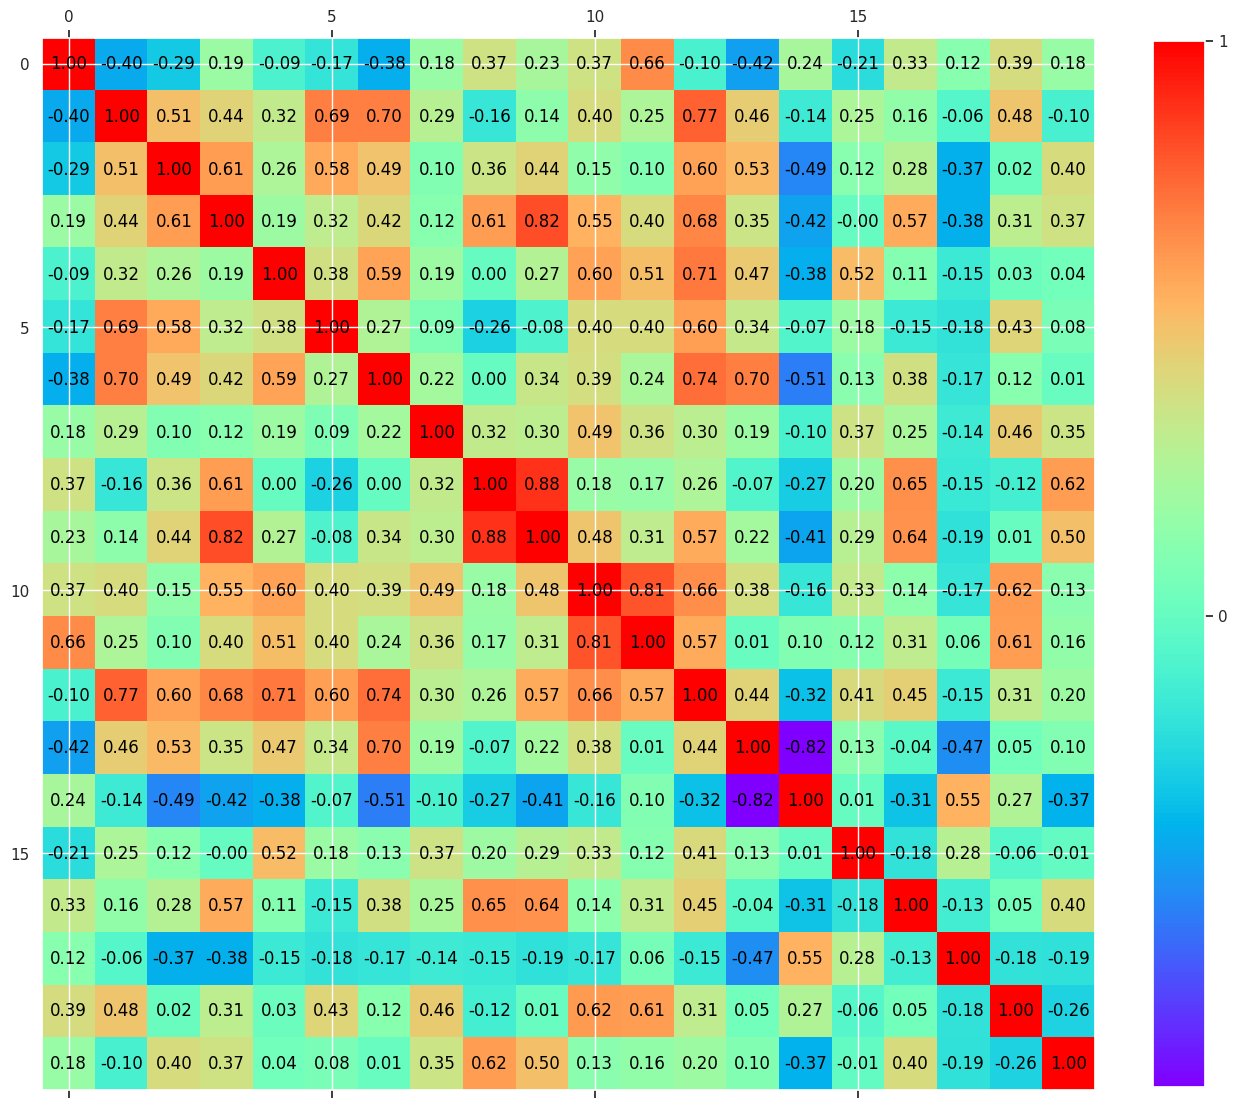

In [11]:
fig, ax = plt.subplots(figsize=(15,15))

img = ax.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

### Standardize the dataset

In [12]:
features = [col for col in df_food.columns[1:]]
y = df_food.loc[:,['Country']].values

df_t = df_food.loc[:, features]
df_st = (df_t - df_t.mean()) / (df_t.std()) # Standardise data
x = df_st.values
# x = df_food.loc[:, features].values

x

array([[ 0.55981209,  0.2466621 ,  0.47935295,  0.19435776, -0.1545475 ,
        -0.03941564,  0.03337709,  1.3889782 ,  0.60011136,  0.57276351,
         0.6216478 ,  0.30407524,  0.01856426,  0.62230338, -0.62723423,
         0.66753572,  0.51118173,  0.67914527,  0.39124238,  0.30997492],
       [ 0.23273087, -1.44330661, -1.18240395, -1.3396803 , -0.24799482,
        -0.67991984, -0.73800447, -1.25008038, -1.26898548, -1.13172548,
        -0.13768039,  0.03607672, -1.3892254 , -0.44216293,  1.05580708,
        -0.5512795 , -1.79204049,  1.38264236, -0.88029534, -0.19373432],
       [ 0.47804179, -0.05666562, -1.00435857, -1.15920523,  0.73320208,
         0.0886852 , -0.35231369,  1.66677384, -0.70012992, -0.86259564,
         0.94707417,  0.9070719 , -0.14232599, -0.48474158,  1.28795071,
         0.81379355, -0.92361244, -0.6574992 ,  1.76450311, -1.13818915],
       [ 0.80512301,  0.809985  ,  1.07283756,  1.3674457 ,  0.07907081,
         0.98539107,  1.19044942, -0.55559128, -

In [13]:
x.shape

(13, 20)

In [14]:
mean_vals = []

for i in range(x.shape[1]):
    mean_i = np.mean(x[:,i])
    mean_vals.append([mean_i])
    
mean_arr = np.array(mean_vals)
mean_arr

array([[ 3.41607085e-17],
       [ 4.27008856e-17],
       [ 1.87883896e-16],
       [-3.41607085e-17],
       [ 7.68615940e-17],
       [ 1.53723188e-16],
       [ 1.97491596e-17],
       [ 0.00000000e+00],
       [-1.36642834e-16],
       [ 3.41607085e-17],
       [ 2.81825845e-16],
       [-3.24526730e-16],
       [-5.87137176e-17],
       [-1.19562480e-16],
       [ 5.12410627e-17],
       [ 5.97812398e-17],
       [-2.22044605e-16],
       [-4.27008856e-17],
       [ 8.54017711e-17],
       [ 4.27008856e-17]])

In [15]:
cov_mat = np.cov([x[:,j] for j in range(x.shape[1])])
cov_mat

array([[ 1.        , -0.39614708, -0.28767679,  0.18773245, -0.09348244,
        -0.17380856, -0.38342236,  0.17888405,  0.37476493,  0.23368149,
         0.37159059,  0.66111712, -0.09622466, -0.42281081,  0.2383226 ,
        -0.20783547,  0.33012094,  0.12238849,  0.38986262,  0.18163516],
       [-0.39614708,  1.        ,  0.50519442,  0.43716769,  0.32424323,
         0.69491639,  0.69528849,  0.28890212, -0.16446845,  0.14433066,
         0.40245155,  0.25431472,  0.76730937,  0.45825608, -0.13784079,
         0.24906705,  0.16077158, -0.06068527,  0.48299172, -0.10443028],
       [-0.28767679,  0.50519442,  1.        ,  0.61268507,  0.25680259,
         0.57704127,  0.49197324,  0.1009813 ,  0.35674427,  0.43596575,
         0.14767853,  0.10453146,  0.59570032,  0.52906161, -0.49302661,
         0.12256113,  0.27926047, -0.37407711,  0.01818871,  0.39954973],
       [ 0.18773245,  0.43716769,  0.61268507,  1.        ,  0.19381135,
         0.3179975 ,  0.41714343,  0.12220452,  

### Calculate Eigenvalue and eigen vector

In [16]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

print ("values\n", eig_val)
print ("vectors\n", eig_vec)

values
 [ 6.71726927e+00+0.00000000e+00j  3.34232358e+00+0.00000000e+00j
  2.98598281e+00+0.00000000e+00j  1.71495103e+00+0.00000000e+00j
  1.32370044e+00+0.00000000e+00j  1.13143004e+00+0.00000000e+00j
  1.00065178e+00+0.00000000e+00j  7.61393834e-01+0.00000000e+00j
  4.81843627e-01+0.00000000e+00j  2.95884246e-01+0.00000000e+00j
  2.18696473e-01+0.00000000e+00j  2.58728687e-02+0.00000000e+00j
  3.38679966e-16+9.27320831e-17j  3.38679966e-16-9.27320831e-17j
 -4.08585468e-16+0.00000000e+00j  8.35484221e-17+0.00000000e+00j
 -2.14999086e-16+0.00000000e+00j -1.06961850e-16+3.69796278e-17j
 -1.06961850e-16-3.69796278e-17j -9.92280955e-17+0.00000000e+00j]
vectors
 [[ 0.00783844+0.j         -0.4084629 +0.j         -0.30426688+0.j
  -0.14042032+0.j         -0.15720348+0.j         -0.09422388+0.j
   0.19732981+0.j          0.04995544+0.j          0.12771667+0.j
   0.3370641 +0.j         -0.15773903+0.j         -0.21135864+0.j
  -0.003007  +0.09404536j -0.003007  -0.09404536j -0.0649282 +0.j
  

Sort the eigen values and their correspoding eigen vectors

In [17]:
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

#sort the tuples from high to low
eig_pairs.sort(key=lambda z: z[0], reverse=True)

#confirm the list is correctly sorted from high to low (only shows the eigenvalue of tuple)
num = 1
for i in eig_pairs:
    print(num)
    print("Eigenvalue", i[0])
    print("Eigenvector", i[1])
    num += 1

1
Eigenvalue 6.717269271625817
Eigenvector [ 0.00783844+0.j  0.25088295+0.j  0.26379551+0.j  0.3075616 +0.j
  0.24333708+0.j  0.19829443+0.j  0.27740544+0.j  0.17786406+0.j
  0.16708899+0.j  0.27206292+0.j  0.28289229+0.j  0.219254  +0.j
  0.35276092+0.j  0.2361455 +0.j -0.20987329+0.j  0.11823783+0.j
  0.19339383+0.j -0.14145774+0.j  0.13612727+0.j  0.14655957+0.j]
2
Eigenvalue 3.34232357693234
Eigenvector [-0.4084629 +0.j  0.29072317+0.j  0.08012012+0.j -0.16292522+0.j
  0.15635054+0.j  0.27659622+0.j  0.21002179+0.j -0.1021976 +0.j
 -0.43127954+0.j -0.30435236+0.j -0.03059694+0.j -0.13242838+0.j
  0.08723895+0.j  0.26308945+0.j -0.04367603+0.j  0.09016861+0.j
 -0.31240199+0.j -0.02485444+0.j  0.02732938+0.j -0.27792015+0.j]
3
Eigenvalue 2.985982810530402
Eigenvector [-0.30426688+0.j -0.10811088+0.j  0.22249049+0.j  0.06378449+0.j
 -0.07008341+0.j -0.16359484+0.j  0.09596394+0.j -0.15824677+0.j
  0.16348487+0.j  0.12516753+0.j -0.29925546+0.j -0.39943877+0.j
 -0.07738579+0.j  0.21596

pick top k=2 eigen values and their corresponding eigen vectors

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(20, 1), eig_pairs[1][1].reshape(20,1)))

print(matrix_w)

[[ 0.00783844+0.j -0.4084629 +0.j]
 [ 0.25088295+0.j  0.29072317+0.j]
 [ 0.26379551+0.j  0.08012012+0.j]
 [ 0.3075616 +0.j -0.16292522+0.j]
 [ 0.24333708+0.j  0.15635054+0.j]
 [ 0.19829443+0.j  0.27659622+0.j]
 [ 0.27740544+0.j  0.21002179+0.j]
 [ 0.17786406+0.j -0.1021976 +0.j]
 [ 0.16708899+0.j -0.43127954+0.j]
 [ 0.27206292+0.j -0.30435236+0.j]
 [ 0.28289229+0.j -0.03059694+0.j]
 [ 0.219254  +0.j -0.13242838+0.j]
 [ 0.35276092+0.j  0.08723895+0.j]
 [ 0.2361455 +0.j  0.26308945+0.j]
 [-0.20987329+0.j -0.04367603+0.j]
 [ 0.11823783+0.j  0.09016861+0.j]
 [ 0.19339383+0.j -0.31240199+0.j]
 [-0.14145774+0.j -0.02485444+0.j]
 [ 0.13612727+0.j  0.02732938+0.j]
 [ 0.14655957+0.j -0.27792015+0.j]]


### Transform Data to new lower dimensions using Eigen Vectors

In [54]:
transformed = np.real(matrix_w.T.dot(x.T))

print(transformed)

[[ 0.71378085 -1.91453299 -0.23653516  1.349863   -0.41736218  0.94329721
   1.96572286 -2.2998872  -1.56773489  0.36126711  1.13118795  0.0659205
  -0.09498707]
 [-0.40587377  0.23393391  0.37674188  0.22110536 -0.03283888 -0.51149307
   1.08122058 -0.33914978 -0.09207793  0.22547362 -1.65304161 -1.11351464
   2.00951435]]


In [20]:
df_final = df_food[['Country']].copy()
df_final['pc1'] = transformed[0,:] * -1
df_final['pc2'] = transformed[1,:]

df_final

,Country,pc1,pc2
0,Germany,-1.427562,-0.811748
1,Italy,3.829066,0.467868
2,France,0.473070,0.753484
3,Holland,-2.699726,0.442211
4,Belgium,0.834724,-0.065678
5,Luxembourg,-1.886594,-1.022986
6,England,-3.931446,2.162441
7,Portugal,4.599774,-0.678300
8,Austria,3.135470,-0.184156
9,Switzerland,-0.722534,0.450947


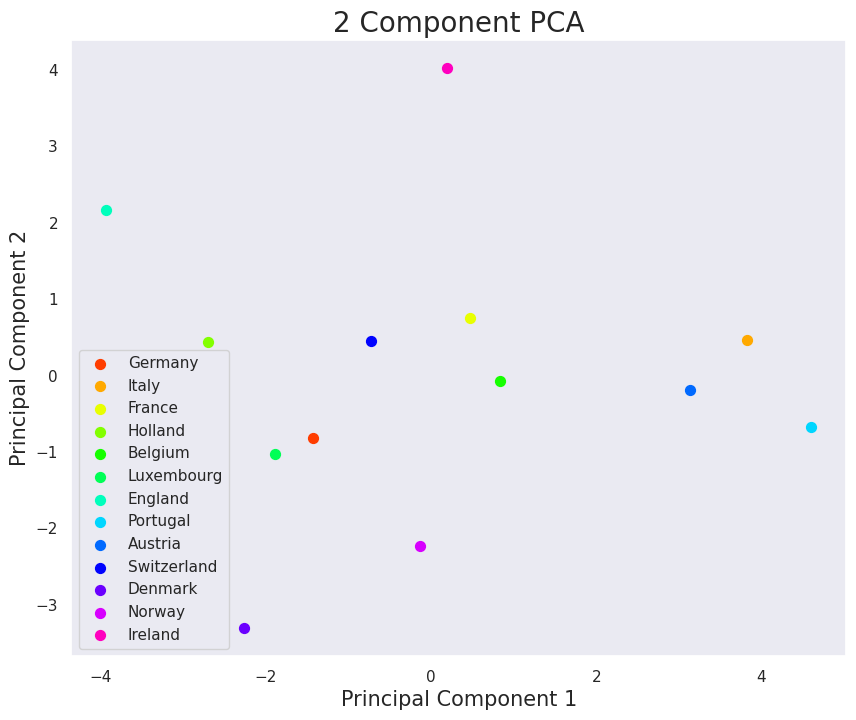

In [21]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = df_food['Country']
n_color = len(df_food)
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*(i+1)/n_color) for i in range(n_color)]

for target, color in zip(targets,colors):
    indicesToKeep = df_final['Country'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'pc1']
               , df_final.loc[indicesToKeep, 'pc2']
               , color = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
variance_explained= [(abs(i)/sum(abs(eig_val)))*100 for i in eig_val]  #gives contribution of each eigen value
variance_explained

[33.586346358129084,
 16.711617884661703,
 14.929914052652013,
 8.574755161501683,
 6.618502194857998,
 5.657150187223248,
 5.003258914156859,
 3.806969170273742,
 2.4092181354323157,
 1.4794212315871895,
 1.0934823661406736,
 0.1293643433834793,
 1.7557288981038127e-15,
 1.7557288981038127e-15,
 2.0429273417095854e-15,
 4.177421104029695e-16,
 1.0749954313616573e-15,
 5.658694683402838e-16,
 5.658694683402838e-16,
 4.961404773764083e-16]

In [23]:
cumulative_variance_explained = np.cumsum(variance_explained) # gives contribution of eigen value in cumulative manner
cumulative_variance_explained

array([ 33.58634636,  50.29796424,  65.2278783 ,  73.80263346,
        80.42113565,  86.07828584,  91.08154475,  94.88851392,
        97.29773206,  98.77715329,  99.87063566, 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ])

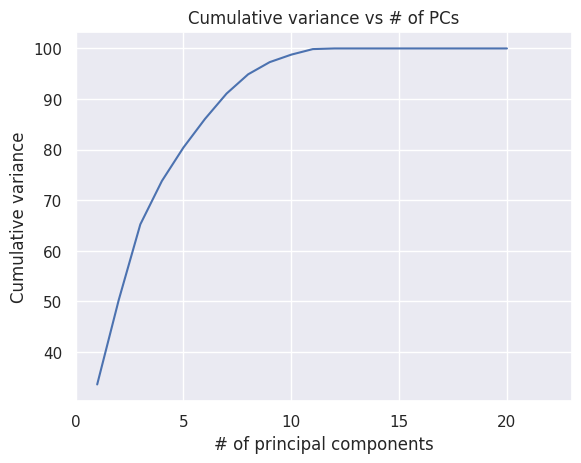

In [24]:
sns.lineplot(x=[i+1 for i in range(len(cumulative_variance_explained))], y=cumulative_variance_explained)
plt.xlim((0,23))
plt.xlabel("# of principal components")
plt.ylabel("Cumulative variance")
plt.title("Cumulative variance vs # of PCs")
plt.show()

## Singular Value Decomposition (SVD)

Calculate SVD via ```np.linalg.svd```

In [25]:
U, S, Vt = np.linalg.svd(x.T, full_matrices=False)
print("Eigen Vectors \n", U)

Eigen Vectors 
 [[-0.00783844  0.4084629  -0.30426688 -0.14042032 -0.15720348  0.09422388
  -0.19732981 -0.04995544  0.12771667 -0.3370641   0.15773903  0.21135864
   0.41398478]
 [-0.25088295 -0.29072317 -0.10811088 -0.06122698  0.34196757 -0.02729715
   0.27168595 -0.04250232  0.07442526  0.13413673  0.25343689  0.13369496
   0.07424661]
 [-0.26379551 -0.08012012  0.22249049 -0.10936531  0.27927452 -0.27550689
  -0.17365215 -0.02766168 -0.01015285 -0.52689638 -0.4163536  -0.32874466
   0.06057793]
 [-0.3075616   0.16292522  0.06378449 -0.20203427  0.20836407  0.04257101
  -0.08783172  0.35991519  0.17135158  0.20149447  0.0875597   0.01919049
  -0.11834924]
 [-0.24333708 -0.15635054 -0.07008341  0.31566996 -0.27266505  0.23394971
  -0.30499203 -0.1145474  -0.38217411  0.0045589  -0.06240706 -0.11555244
   0.11757017]
 [-0.19829443 -0.27659622 -0.16359484 -0.16202904  0.20320437 -0.35186158
  -0.35738483 -0.12815295 -0.05637802 -0.03810726  0.28832316 -0.03857054
   0.22009911]
 [-0.2

### Examin the work by 
$
\textbf{X} - \textbf{U} \boldsymbol\Sigma \textbf{V}^{T} == \textbf{0}
$

In [59]:
np.round(x - (U @ np.diag(S) @ Vt).T ,6)

array([[-0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,  0.,
         0., -0., -0.,  0.,  0.,  0., -0.],
       [ 0., -0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,
        -0., -0.,  0.,  0.,  0., -0.,  0.],
       [-0., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,
         0., -0., -0.,  0., -0., -0.,  0.],
       [ 0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,
        -0., -0.,  0.,  0.,  0., -0.,  0.],
       [ 0.,  0., -0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,  0.,
         0., -0., -0.,  0., -0.,  0., -0.],
       [-0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,
        -0., -0., -0.,  0., -0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0., -0.,
        -0.,  0., -0.,  0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,
        -0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  

In [27]:
S

array([8.97815300e+00, 6.33307847e+00, 5.98596640e+00, 4.53645372e+00,
       3.98552447e+00, 3.68471986e+00, 3.46523035e+00, 3.02270177e+00,
       2.40460465e+00, 1.88430649e+00, 1.61998694e+00, 5.57202319e-01,
       1.26064543e-15])

In [42]:
# 2 principle component vectors
U[:,:2]

array([[-0.00783844,  0.4084629 ],
       [-0.25088295, -0.29072317],
       [-0.26379551, -0.08012012],
       [-0.3075616 ,  0.16292522],
       [-0.24333708, -0.15635054],
       [-0.19829443, -0.27659622],
       [-0.27740544, -0.21002179],
       [-0.17786406,  0.1021976 ],
       [-0.16708899,  0.43127954],
       [-0.27206292,  0.30435236],
       [-0.28289229,  0.03059694],
       [-0.219254  ,  0.13242838],
       [-0.35276092, -0.08723895],
       [-0.2361455 , -0.26308945],
       [ 0.20987329,  0.04367603],
       [-0.11823783, -0.09016861],
       [-0.19339383,  0.31240199],
       [ 0.14145774,  0.02485444],
       [-0.13612727, -0.02732938],
       [-0.14655957,  0.27792015]])

In [55]:
# principle component vectors

U @ np.diag(S)

array([[-7.03746981e-02,  2.58682760e+00, -1.82133132e+00,
        -6.37010276e-01, -6.26538304e-01,  3.47188593e-01,
        -6.83793259e-01, -1.51000412e-01,  3.07108098e-01,
        -6.35132068e-01,  2.55535171e-01,  1.17769523e-01,
         5.21888028e-16],
       [-2.25246547e+00, -1.84117267e+00, -6.47148122e-01,
        -2.77753357e-01,  1.36292011e+00, -1.00582334e-01,
         9.41454386e-01, -1.28471824e-01,  1.78963323e-01,
         2.52754708e-01,  4.10564446e-01,  7.44951439e-02,
         9.35986495e-17],
       [-2.36839644e+00, -5.07407032e-01,  1.33182059e+00,
        -4.96130665e-01,  1.11305543e+00, -1.01516571e+00,
        -6.01744701e-01, -8.36130239e-02, -2.44135893e-02,
        -9.92834261e-01, -6.74487394e-01, -1.83177285e-01,
         7.63672947e-17],
       [-2.76133511e+00,  1.03181822e+00,  3.81811786e-01,
        -9.16519127e-01,  8.30440099e-01,  1.56862247e-01,
        -3.04357153e-01,  1.08791627e+00,  4.12032818e-01,
         3.79677330e-01,  1.41845568e

<AxesSubplot: >

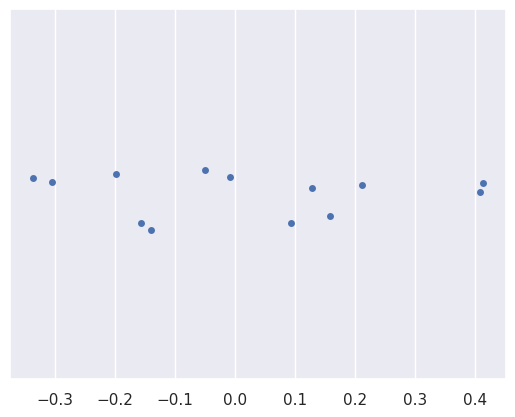

In [29]:
sns.stripplot(x=U[0])

## END